In [ ]:
import numpy as np
import math
import scipy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt

print('Numpy Version: ',np.__version__)
print('Scipy Version: ',sp.__version__)

Numpy Version:  1.23.5
Scipy Version:  1.11.2


In [ ]:
def func(x):
  return x**2

In [ ]:
x = 6

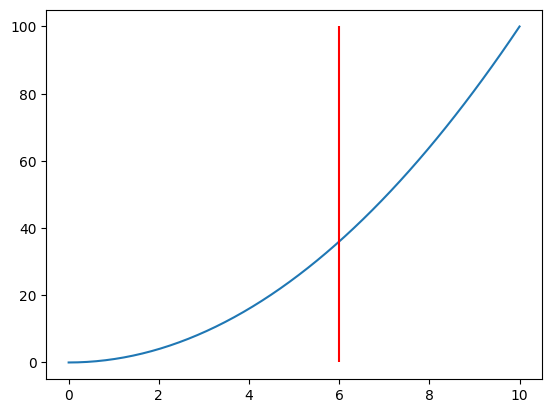

In [ ]:
t = np.linspace(0,10)
f = func(t)
plt.plot(t,f)
plt.vlines(x=x, ymin=min(f), ymax=max(f), colors='red', label='vline_multiple - full height')
plt.show()

In [ ]:
def h_calc(e,f0,f2d):
  return 2*np.sqrt(e*np.abs(f0/f2d))

In [ ]:
def fd(h):
  return (func(x+h)-func(x-h))/(2*h)

In [ ]:
def f2d(h):
  return (func(x+h) - func(x-h))/(2*h)

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
h = 1E-11
e = 2.22E-16
f0 = func(x)
f2 = f2d(h)
h = h_calc(e,f0,f2)
number = fd(h)
print(h)
print(number)

5.161471352381397e-08
11.999999969403568


<ipython-input-203-c891e7b3681c>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (func(x+h)-func(x-h))/(2*h)


<function matplotlib.pyplot.show(close=None, block=None)>

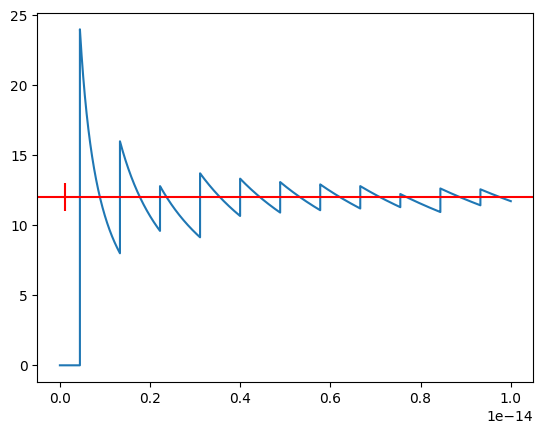

In [ ]:
numerical_diff_tracker = []
h = np.linspace(0,1E-14,100000)
for item in h:
  number = fd(item)
  numerical_diff_tracker.append(number)

plt.plot(h,numerical_diff_tracker)
plt.vlines(x=1.11E-16, ymin=11, ymax=13, colors='red', label='vline_multiple - full height')
plt.axhline(y = 12, color = 'r', linestyle = '-')
plt.show

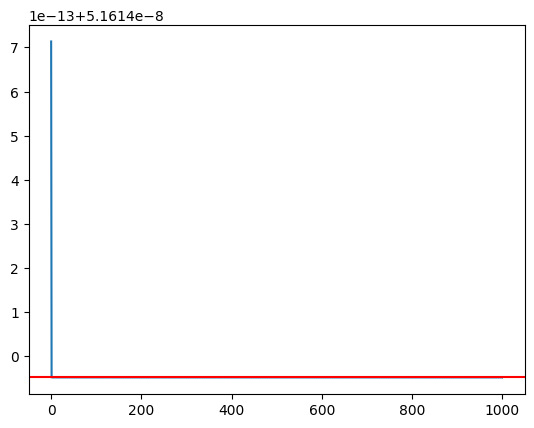

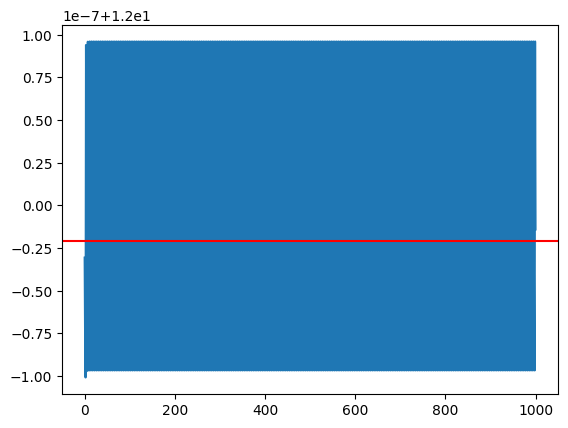

Mean of step size is : 5.161395240852538e-08
Standard deviation of step size is : 2.40691018108925e-14
Mean of value is : 11.999999979010479
Standard deviation of value is : 7.378558683960758e-08


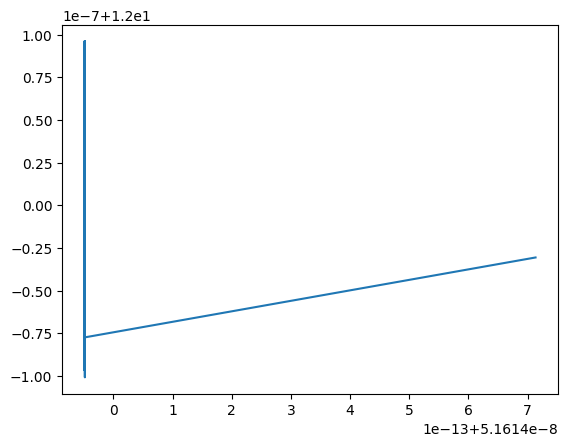

In [ ]:
h = 1E-11

h_tracker = []
numerical_diff_tracker = []

i = 0

prop = 1000

t = np.linspace(0,prop,prop+1)

while i <= max(t):
  f0 = func(x)
  f2 = f2d(h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = fd(h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

plt.plot(t,h_tracker)
plt.axhline(y = Average(h_tracker), color = 'r', linestyle = '-')
plt.show()

plt.plot(t,numerical_diff_tracker)
plt.axhline(y = Average(numerical_diff_tracker), color = 'r', linestyle = '-')
plt.show()

plt.plot(h_tracker, numerical_diff_tracker)
plt.show


# Standard deviation of list
# Using sum() + list comprehension
mean = sum(h_tracker) / len(h_tracker)
variance = sum([((x - mean) ** 2) for x in h_tracker]) / len(h_tracker)
res = variance ** 0.5

# Printing result
print("Mean of step size is : " + str(Average(h_tracker)))
print("Standard deviation of step size is : " + str(res))

# Standard deviation of list
# Using sum() + list comprehension
mean = sum(numerical_diff_tracker) / len(numerical_diff_tracker)
variance = sum([((x - mean) ** 2) for x in numerical_diff_tracker]) / len(numerical_diff_tracker)
res = variance ** 0.5

# Printing result
print("Mean of value is : " + str(Average(numerical_diff_tracker)))
print("Standard deviation of value is : " + str(res))

In [ ]:
#Using as much of the format from the EoM_Solver as possible
Environment_Data = [0.33,0.11,0.2,677.5,1650,9.81,212.2,1.4,0.32,0.524,0.017,0.029,0.029, 0]
#Environment_Data = [a1,a2,c,Kc,rho,g,Kp,n0,n1,phi,beta,kx,ky,q] SHOULD G BE POSITIVE OR NEGATIVE?
Rover_Data = [2.28,0.1,0.00762,0.015,24,0.1,0.1,0.2,[0,0,0]]
#Rover_Data = [m,wr,ww,hg,ng,RH,RW,RL,RCM]
slip = 0.1
tf_sensor_1 = math.radians(5)
tr_sensor_1 = math.radians(-2)
tf_sensor_2 = math.radians(5)
tr_sensor_2 = math.radians(-2)
tf_sensor_3 = math.radians(2)
tr_sensor_3 = math.radians(-1)
tf_sensor_4 = math.radians(2)
tr_sensor_4 = math.radians(-1)
a1,a2,c,Kc,rho,g,Kp,n0,n1,phi,beta,kx,ky,q = Environment_Data
m,wr,ww,hg,ng,RH,RW,RL,RCM = Rover_Data

px0 = 0
vx0 = 0
py0 = 0
vy0 = 0
pz0 = 0
vz0 = 0
T = 1

#Force Claculations for s >= 0
def Force(a1, a2, s, tf, wr, ww, n0, n1, tr, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng):
  tm = (a1+a2*s)*tf
  n = n0 +n1*np.abs(s)
  sigma_1 = lambda t: (np.cos(t)-np.cos(tf))**(n)
  sigma_2 = lambda t:(np.cos(tf-((t-tr)/((tm)-tr))*(tf-(tm)))-np.cos(tf))**(n)
  sigma_integral1 = quad(sigma_1,tm, tf)
  sigma_integral2 = quad(sigma_2,tr,tm)
  sigma = (c*Kc+rho*g*ww*Kp)*((wr/ww)**n)*((sigma_integral1[0])+(sigma_integral2[0]))
  Fn = sigma*((wr)*(ww))
  jx_integral = lambda t: wr*(tf-t-(1-s))*(np.sin(tf)-np.sin(t))
  jx = quad(jx_integral,tr,tf)
  tau_x = (c+sigma*np.tan(phi))*(1-np.exp((-jx[0])/kx))
  F_tau_x = tau_x*((wr)*(ww))
  jy_integral = lambda t: wr*(1-s)*(tf-t)*np.tan(beta)
  jy = quad(jy_integral,tr,tf)
  tau_y = (c+sigma*np.tan(phi))*(1-np.exp((-jy[0])/ky))
  F_tau_y = tau_y*((wr)*(ww))
  Kpq =(np.tan((np.pi/4)+(phi/2)))**2
  Kpc =2*np.sqrt(np.tan((np.pi/4)+(phi/2))**2)
  beta_b=tr
  Fg = 0
  while beta_b < tf:
    Kpg = ((np.tan((np.pi/4)+(phi/2)))**2)*np.cos(beta_b)
    Fg_calc = ww*(0.5*rho*g*hg**2*Kpg+q*hg*Kpq+c*hg*Kpc)
    Fg = Fg + Fg_calc
    beta_b = beta_b + (2*np.pi/ng)
  return Fn, F_tau_x, F_tau_y, Fg

def pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng):
    Fn_1, F_tau_x_1, F_tau_y_1, Fg_1 = Force(a1, a2, slip, tf_sensor_1, wr, ww, n0, n1, tr_sensor_1, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
    tm_1 = (a1 + a2 * slip) * tf_sensor_1
    F_1x = (Fn_1 * np.sin(tm_1)) + (F_tau_x_1) + (Fg_1 * np.sin(tm_1))
    F_1y = F_tau_y_1
    F_1z = (Fn_1 * np.cos(tm_1)) + (Fg_1 * np.cos(tm_1))

    Fn_2, F_tau_x_2, F_tau_y_2, Fg_2 = Force(a1, a2, slip, tf_sensor_2, wr, ww, n0, n1, tr_sensor_2, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
    tm_2 = (a1 + a2 * slip) * tf_sensor_2
    F_2x = (Fn_2 * np.sin(tm_2)) + (F_tau_x_2) + (Fg_2 * np.sin(tm_2))
    F_2y = -F_tau_y_2
    F_2z = (Fn_2 * np.cos(tm_2)) + (Fg_2 * np.cos(tm_2))

    Fn_3, F_tau_x_3, F_tau_y_3, Fg_3 = Force(a1, a2, slip, tf_sensor_3, wr, ww, n0, n1, tr_sensor_3, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
    tm_3 = (a1 + a2 * slip) * tf_sensor_3
    F_3x = (Fn_3 * np.sin(tm_3)) + (F_tau_x_3) + (Fg_3 * np.sin(tm_3))
    F_3y = -F_tau_y_3
    F_3z = (Fn_3 * np.cos(tm_3)) + (Fg_3 * np.cos(tm_3))

    Fn_4, F_tau_x_4, F_tau_y_4, Fg_4 = Force(a1, a2, slip, tf_sensor_4, wr, ww, n0, n1, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
    tm_4 = (a1 + a2 * slip) * tf_sensor_4
    F_4x = (Fn_4 * np.sin(tm_4)) + (F_tau_x_4) + (Fg_4 * np.sin(tm_4))
    F_4y = F_tau_y_4
    F_4z = (Fn_4 * np.cos(tm_4)) + (Fg_4 * np.cos(tm_4))

    F_x = F_1x + F_2x + F_3x + F_4x
    F_y = F_1y + F_2y + F_3y + F_4y #Since the only force here is lateral shear force, which is only durring steering, this is set to 0 by calculation, in practice when steering this will be non zero, will need data to confirm.
    F_z = F_1z + F_2z + F_3z + F_4z

    position_x = px0+vx0*T + 0.5*(F_x/m)*T**2

    position_y = py0+vy0*T + 0.5*(F_y/m)*T**2

    position_z = pz0+vz0*T + 0.5*(F_z/m)*T**2

    velocity_x = vx0 + (F_x/m)*T

    velocity_y = vy0 + (F_y/m)*T

    velocity_z = vz0 + (F_z/m)*T

    return position_x



In [ ]:
def results(t, h_tracker, numerical_diff_tracker):

  plt.plot(t,h_tracker)
  plt.axhline(y = Average(h_tracker), color = 'r', linestyle = '-')
  plt.show()

  plt.plot(t,numerical_diff_tracker)
  plt.axhline(y = Average(numerical_diff_tracker), color = 'r', linestyle = '-')
  plt.show()

  n = 10

  h_tracker = h_tracker[n:]
  numerical_diff_tracker = numerical_diff_tracker[n:]

  # Standard deviation of list
  # Using sum() + list comprehension
  mean = sum(h_tracker) / len(h_tracker)
  variance = sum([((x - mean) ** 2) for x in h_tracker]) / len(h_tracker)
  res = variance ** 0.5

  # Printing result
  print("Mean of step size is : " + str(mean))
  print("Standard deviation of step size is : " + str(res))

  # Standard deviation of list
  # Using sum() + list comprehension
  mean = sum(numerical_diff_tracker) / len(numerical_diff_tracker)
  variance = sum([((x - mean) ** 2) for x in numerical_diff_tracker]) / len(numerical_diff_tracker)
  res = variance ** 0.5
  SE = res/len(numerical_diff_tracker)

  # Printing result
  print("Mean of sample is : " + str(mean))
  print("Standard deviation of sample is : " + str(res))
  print("Standard Error of sample is : " + str(SE))


  return mean, res, SE

In [ ]:
prop = 1000
t = np.linspace(0,prop,prop+1)
h = 1E-11

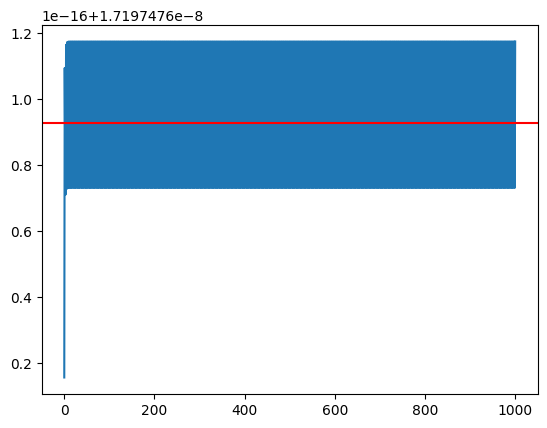

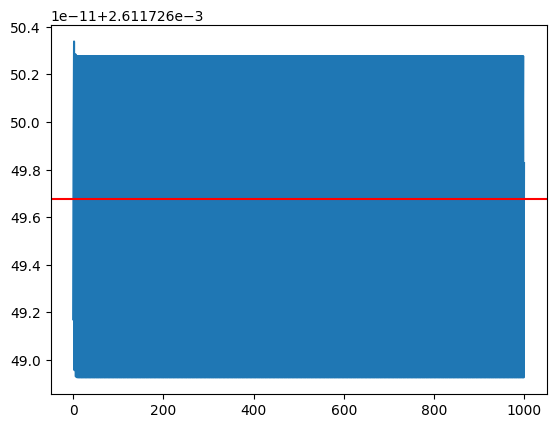

Mean of step size is : 1.7197476092871926e-08
Standard deviation of step size is : 1.8498590000942877e-17
Mean of sample is : 0.0026117264967698123
Standard deviation of sample is : 5.61379841558359e-12
Standard Error of sample is : 5.664781448621181e-15


In [ ]:
#a1
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1+h, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1-h, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1+h, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1-h, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

a1_mean, a1_res, a1_SE = results(t, h_tracker, numerical_diff_tracker)

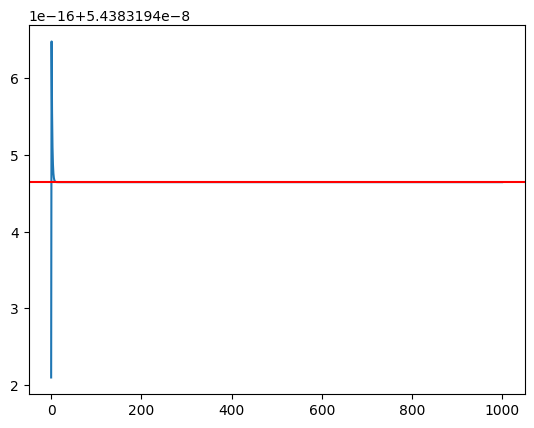

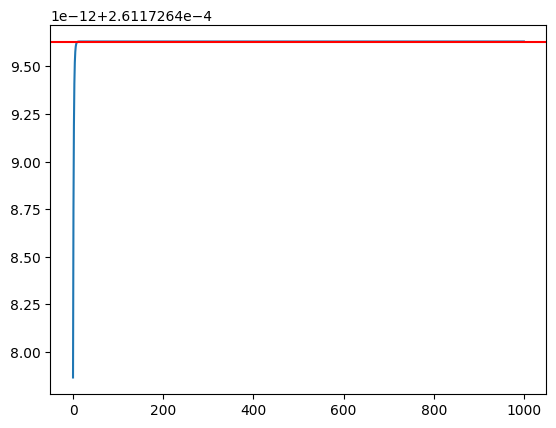

Mean of step size is : 5.438319446450383e-08
Standard deviation of step size is : 1.3173111293493697e-20
Mean of sample is : 0.0002611726496306001
Standard deviation of sample is : 6.314568554636558e-17
Standard Error of sample is : 6.371915796807829e-20


In [ ]:
#a2
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2+h, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2-h, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2+h, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2-h, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

a2_mean, a2_res, a2_SE = results(t, h_tracker, numerical_diff_tracker)

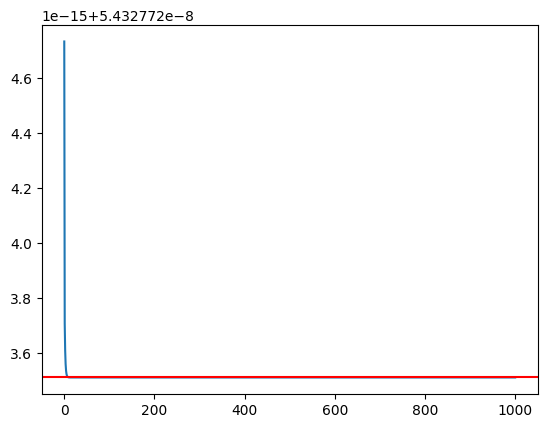

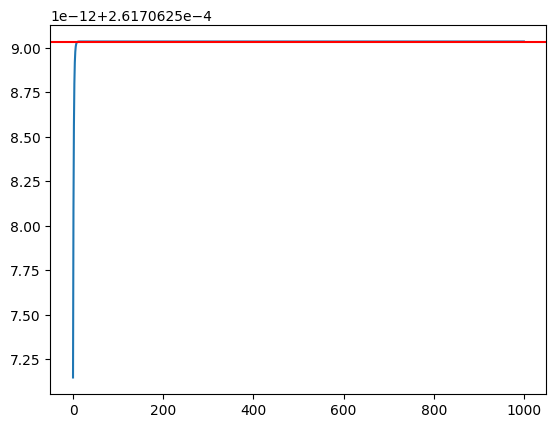

Mean of step size is : 5.4327723511016826e-08
Standard deviation of step size is : 1.404805923859087e-20
Mean of sample is : 0.00026170625903451547
Standard deviation of sample is : 6.763988746616564e-17
Standard Error of sample is : 6.825417504153949e-20


In [ ]:
#slip
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip+h, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip-h, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip+h, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip-h, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

slip_mean, slip_res, slip_SE = results(t, h_tracker, numerical_diff_tracker)

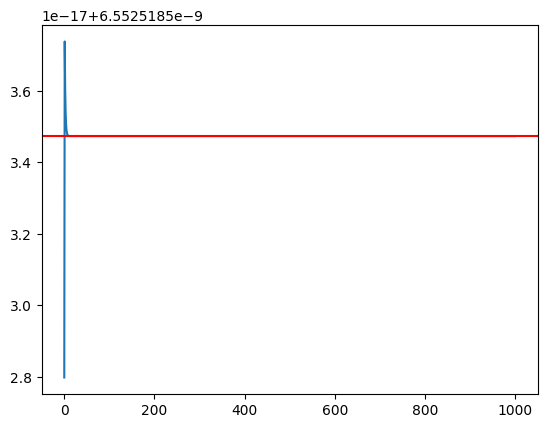

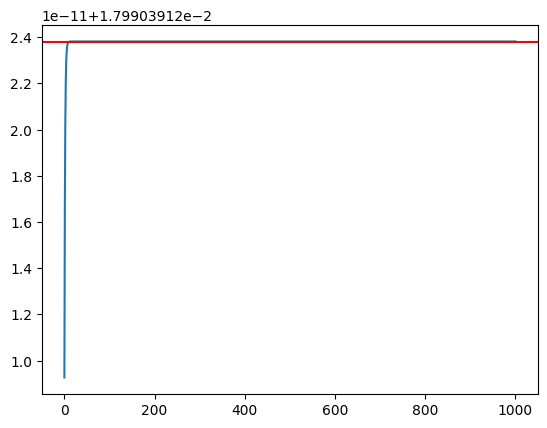

Mean of step size is : 6.552518534731951e-09
Standard deviation of step size is : 2.0758272030438307e-22
Mean of sample is : 0.017990391223816488
Standard deviation of sample is : 5.334915986711548e-16
Standard Error of sample is : 5.383366283260896e-19


In [ ]:
#tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1+h, tf_sensor_2+h, tf_sensor_3+h, tf_sensor_4+h, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1-h, tf_sensor_2-h, tf_sensor_3-h, tf_sensor_4-h, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1+h, tf_sensor_2+h, tf_sensor_3+h, tf_sensor_4+h, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1-h, tf_sensor_2-h, tf_sensor_3-h, tf_sensor_4-h, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

tf_mean, tf_res, tf_SE = results(t, h_tracker, numerical_diff_tracker)

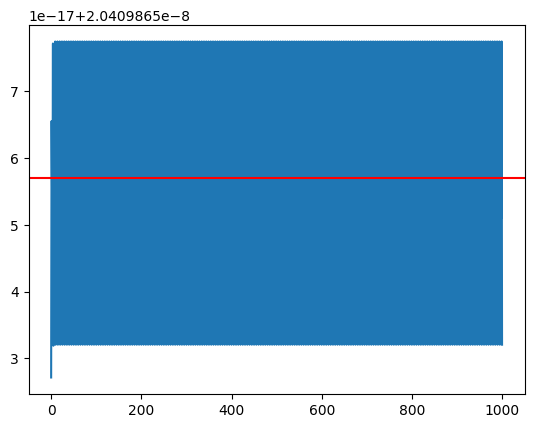

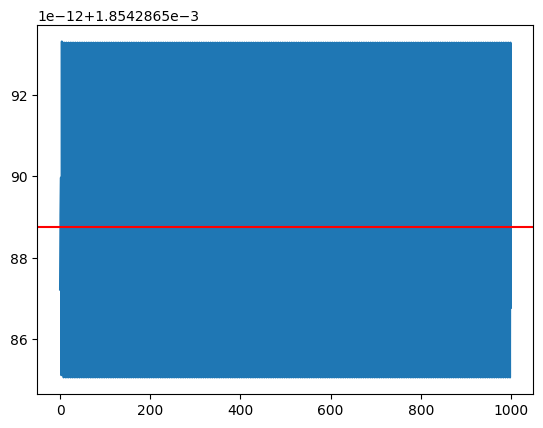

Mean of step size is : 2.040986505693389e-08
Standard deviation of step size is : 1.544649062461229e-17
Mean of sample is : 0.0018542865887561653
Standard deviation of sample is : 2.803734879515128e-12
Standard Error of sample is : 2.829197658441098e-15


In [ ]:
#wr
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr+h, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr-h, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr+h, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr-h, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

wr_mean, wr_res, wr_SE = results(t, h_tracker, numerical_diff_tracker)

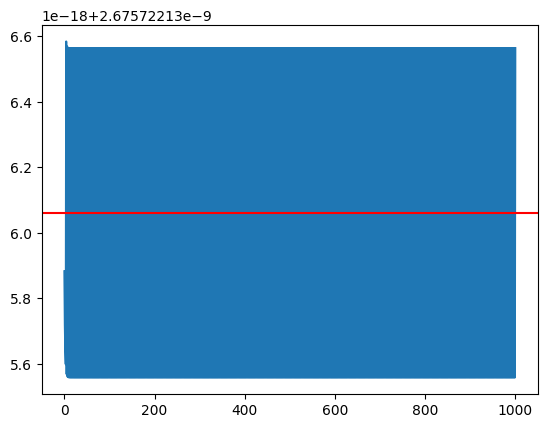

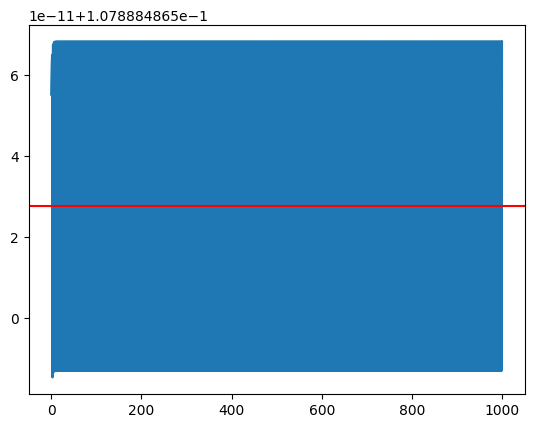

Mean of step size is : 2.675722136061117e-09
Standard deviation of step size is : 5.024644078130198e-19
Mean of sample is : 0.10788848652765969
Standard deviation of sample is : 4.0519947148070934e-11
Standard Error of sample is : 4.08879385954298e-14


In [ ]:
#ww
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww+h, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww-h, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww+h, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww-h, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

ww_mean, ww_res, ww_SE = results(t, h_tracker, numerical_diff_tracker)

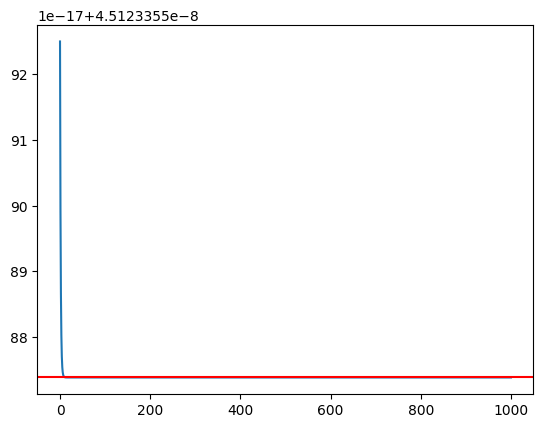

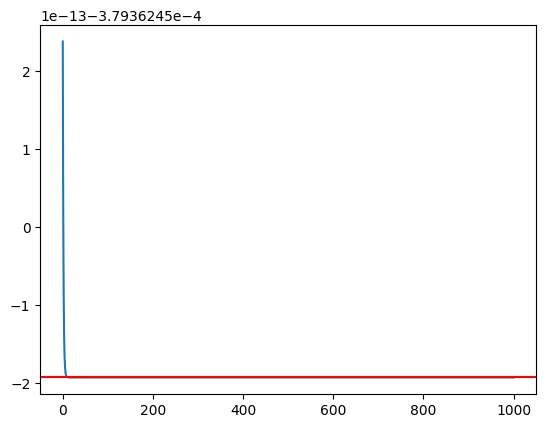

Mean of step size is : 4.5123355873819256e-08
Standard deviation of step size is : 2.0867084008238932e-21
Mean of sample is : -0.00037936245019270864
Standard deviation of sample is : 1.633295317648785e-17
Standard Error of sample is : 1.6481284739140113e-20


In [ ]:
#n0
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0+h, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0-h, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0+h, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0-h, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

n0_mean, n0_res, n0_SE = results(t, h_tracker, numerical_diff_tracker)

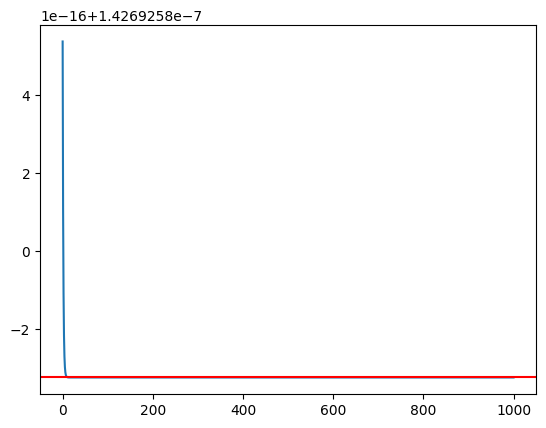

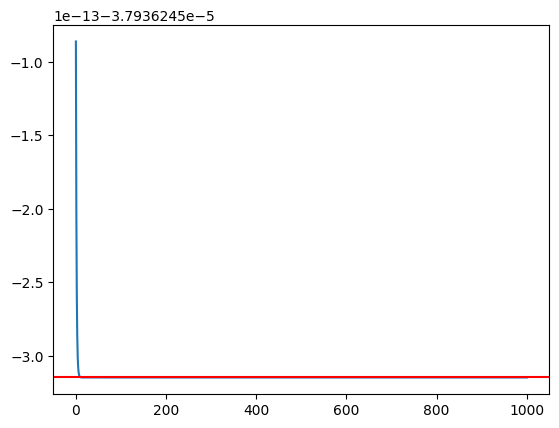

Mean of step size is : 1.4269257967568763e-07
Standard deviation of step size is : 3.0786208645716963e-20
Mean of sample is : -3.793624531486677e-05
Standard deviation of sample is : 8.244299387334726e-18
Standard Error of sample is : 8.319171934747453e-21


In [ ]:
#n1
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1+h, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1-h, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1+h, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1-h, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

n1_mean, n1_res, n1_SE = results(t, h_tracker, numerical_diff_tracker)

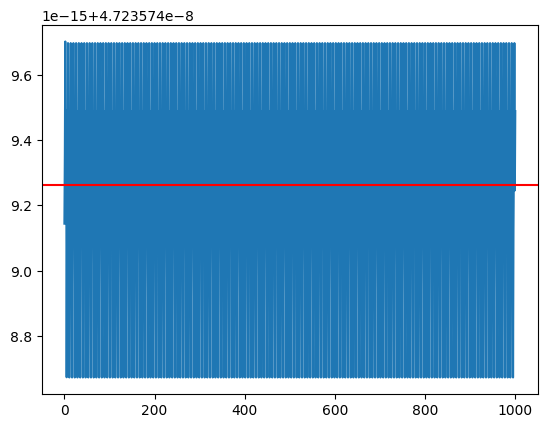

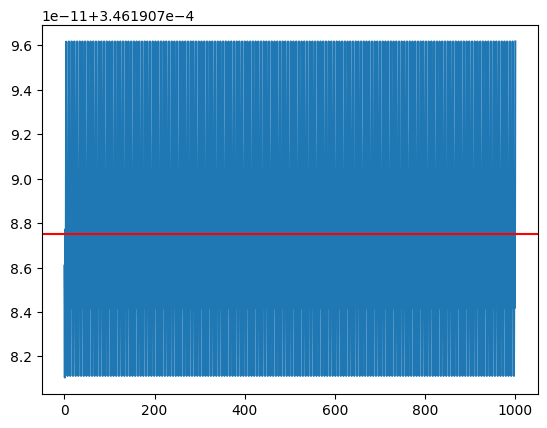

Mean of step size is : 4.723574926376909e-08
Standard deviation of step size is : 3.207387020418184e-16
Mean of sample is : 0.0003461907875093714
Standard deviation of sample is : 4.708264896196477e-12
Standard Error of sample is : 4.751024113215416e-15


In [ ]:
#tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1+h, tr_sensor_2+h, tr_sensor_3+h, tr_sensor_4+h, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1-h, tr_sensor_2-h, tr_sensor_3-h, tr_sensor_4-h, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1+h, tr_sensor_2+h, tr_sensor_3+h, tr_sensor_4+h, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1-h, tr_sensor_2-h, tr_sensor_3-h, tr_sensor_4-h, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

tr_mean, tr_res, tr_SE = results(t, h_tracker, numerical_diff_tracker)

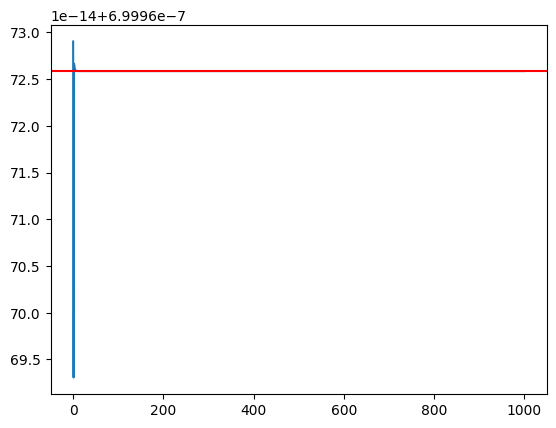

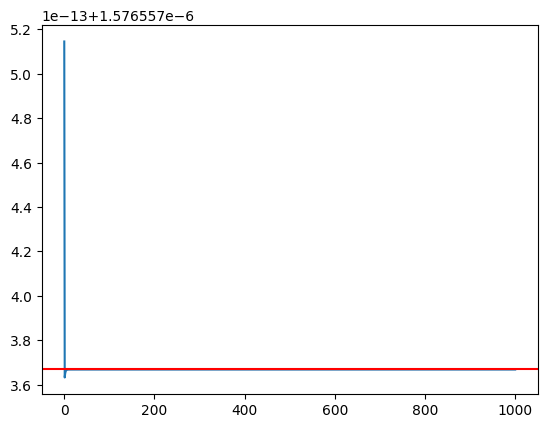

Mean of step size is : 6.999607258570756e-07
Standard deviation of step size is : 1.1390468639873491e-19
Mean of sample is : 1.5765573668281865e-06
Standard deviation of sample is : 2.5774603620611845e-19
Standard Error of sample is : 2.600868175641962e-22


In [ ]:
#c
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c+h, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c-h, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c+h, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c-h, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

c_mean, c_res, c_SE = results(t, h_tracker, numerical_diff_tracker)

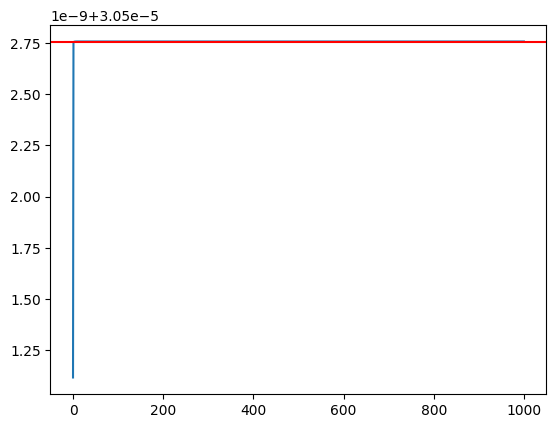

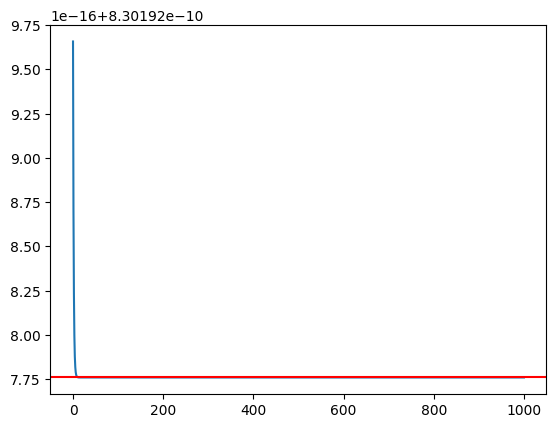

Mean of step size is : 3.05027564399306e-05
Standard deviation of step size is : 2.4942600875556267e-16
Mean of sample is : 8.301927759062379e-10
Standard deviation of sample is : 6.788632549793674e-21
Standard Error of sample is : 6.850285115836199e-24


In [ ]:
#Kc
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc+h, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc-h, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc+h, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc-h, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

Kc_mean, Kc_res, Kc_SE = results(t, h_tracker, numerical_diff_tracker)

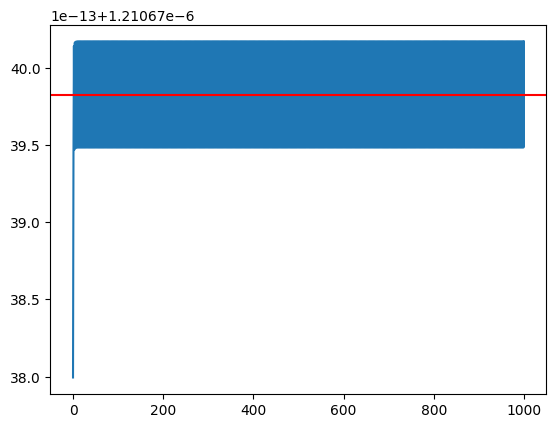

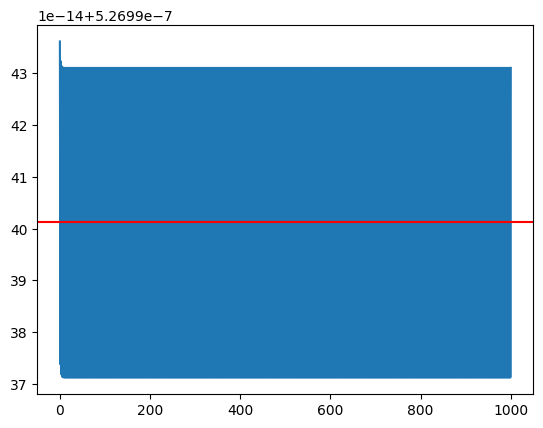

Mean of step size is : 1.210673982683419e-06
Standard deviation of step size is : 3.428909319292655e-14
Mean of sample is : 5.269904011642465e-07
Standard deviation of sample is : 2.985118917126084e-14
Standard Error of sample is : 3.0122289779274307e-17


In [ ]:
#rho
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho+h, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho-h, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho+h, g, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho-h, g, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

rho_mean, rho_res, rho_SE = results(t, h_tracker, numerical_diff_tracker)

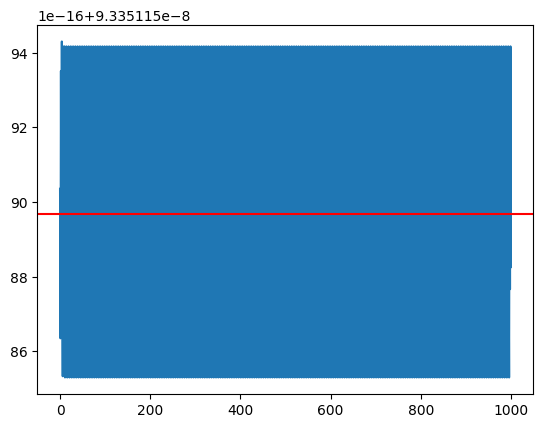

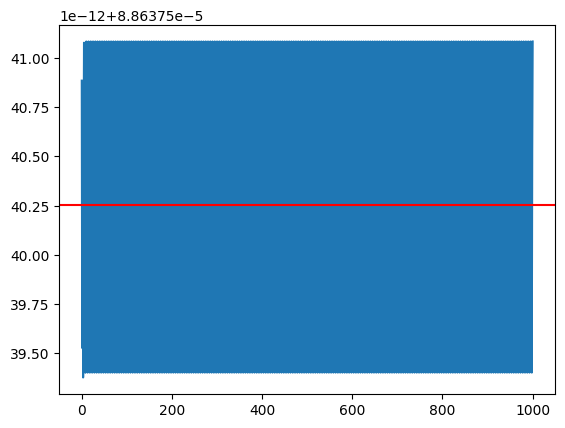

Mean of step size is : 9.335115896725643e-08
Standard deviation of step size is : 3.3592269464343103e-16
Mean of sample is : 8.863754025439463e-05
Standard deviation of sample is : 6.384106932564852e-13
Standard Error of sample is : 6.442085703899951e-16


In [ ]:
#g
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g+h, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g-h, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g+h, Kp, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g-h, Kp, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

g_mean, g_res, g_SE = results(t, h_tracker, numerical_diff_tracker)

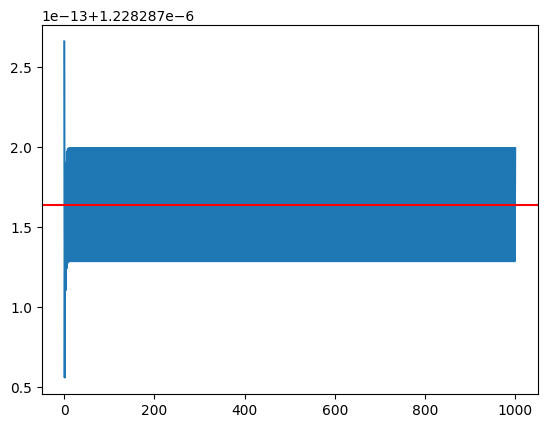

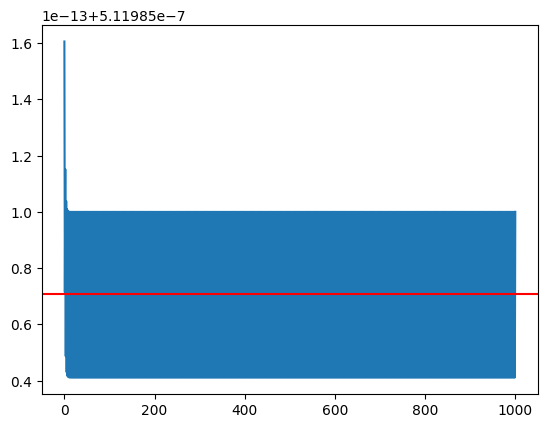

Mean of step size is : 1.2282871640427815e-06
Standard deviation of step size is : 3.5293955896936107e-14
Mean of sample is : 5.119850706095655e-07
Standard deviation of sample is : 2.942317063369424e-14
Standard Error of sample is : 2.969038409050882e-17


In [ ]:
#Kp
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp+h, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp-h, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp+h, phi, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp-h, phi, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

Kp_mean, Kp_res, Kp_SE = results(t, h_tracker, numerical_diff_tracker)

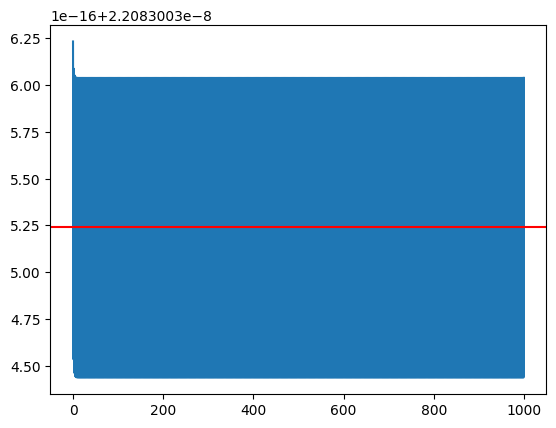

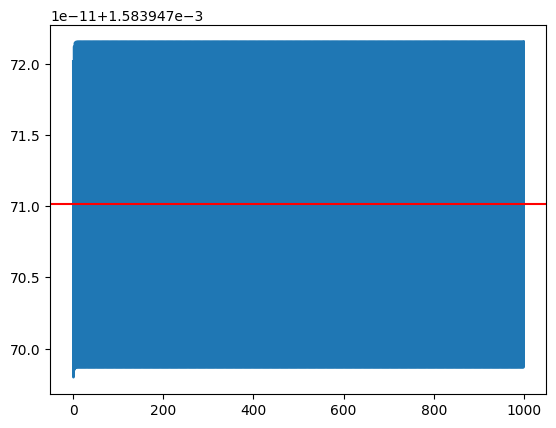

Mean of step size is : 2.2083003523877785e-08
Standard deviation of step size is : 7.985756500331538e-17
Mean of sample is : 0.001583947710127973
Standard deviation of sample is : 1.1455885480217189e-11
Standard Error of sample is : 1.1559924803448222e-14


In [ ]:
#phi
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi+h, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi-h, kx, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi+h, kx, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi-h, kx, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

phi_mean, phi_res, phi_SE = results(t, h_tracker, numerical_diff_tracker)

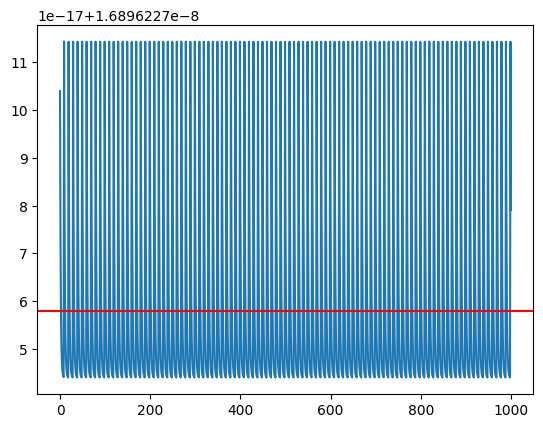

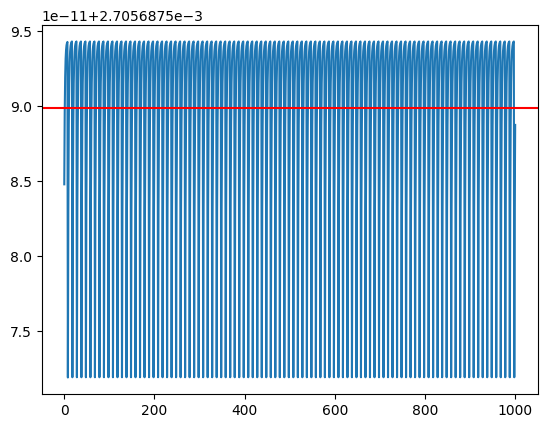

Mean of step size is : 1.6896227058029315e-08
Standard deviation of step size is : 2.145295755851297e-17
Mean of sample is : 0.0027056875898779113
Standard deviation of sample is : 6.867508644302198e-12
Standard Error of sample is : 6.929877542181835e-15


In [ ]:
#kx
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx+h, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx-h, hg, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx+h, hg, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx-h, hg, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

kx_mean, kx_res, kx_SE = results(t, h_tracker, numerical_diff_tracker)

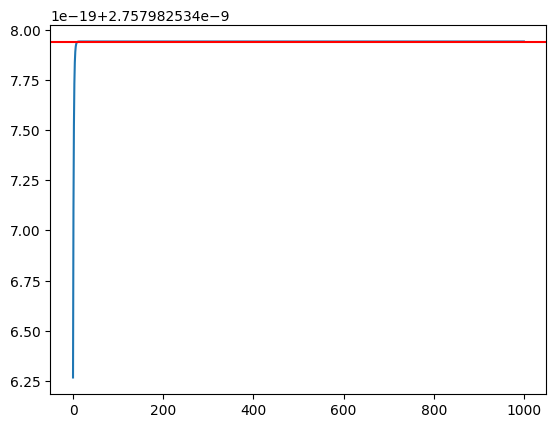

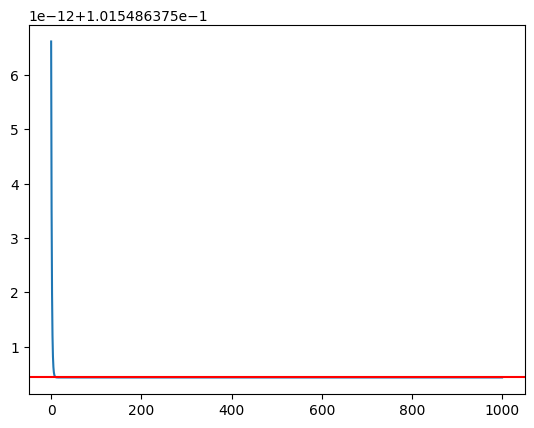

Mean of step size is : 2.7579825347944765e-09
Standard deviation of step size is : 5.813328908932356e-23
Mean of sample is : 0.10154863747043295
Standard deviation of sample is : 6.091074159113647e-16
Standard Error of sample is : 6.146391684272096e-19


In [ ]:
#hg
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg+h, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg-h, q, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg+h, q, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg-h, q, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

hg_mean, hg_res, hg_SE = results(t, h_tracker, numerical_diff_tracker)

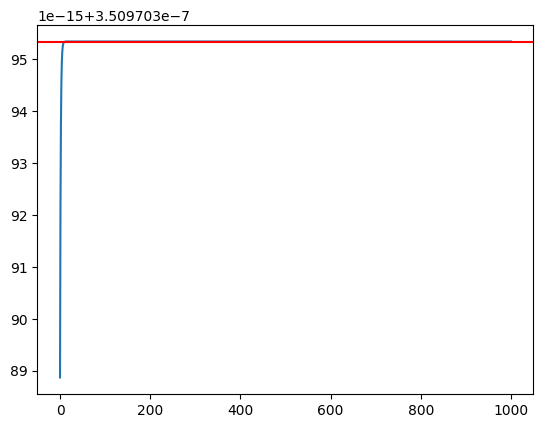

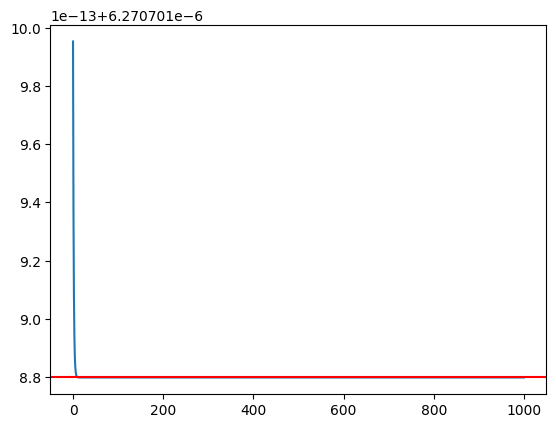

Mean of step size is : 3.5097039532876967e-07
Standard deviation of step size is : 2.311907783430389e-19
Mean of sample is : 6.27070187983861e-06
Standard deviation of sample is : 4.13054297000256e-18
Standard Error of sample is : 4.16805546922559e-21


In [ ]:
#q
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q+h, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q-h, m, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q+h, m, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q-h, m, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

q_mean, q_res, q_SE = results(t, h_tracker, numerical_diff_tracker)

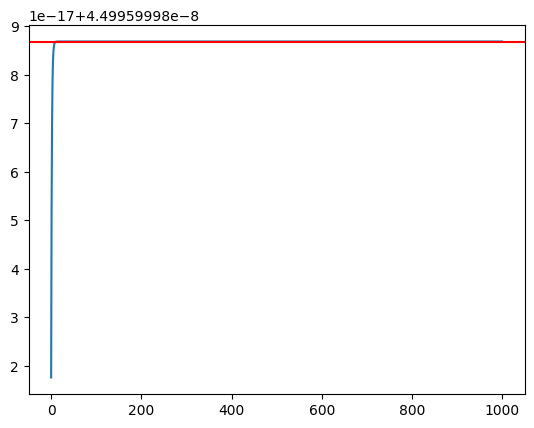

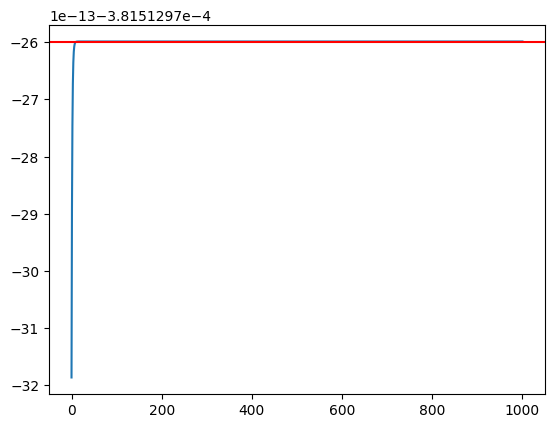

Mean of step size is : 4.4995999886869606e-08
Standard deviation of step size is : 2.477912735149996e-21
Mean of sample is : -0.0003815129725987705
Standard deviation of sample is : 2.1521612504316553e-17
Standard Error of sample is : 2.171706609920944e-20


In [ ]:
#m
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m+h, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m-h, beta, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m+h, beta, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m-h, beta, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

m_mean, m_res, m_SE = results(t, h_tracker, numerical_diff_tracker)

<ipython-input-202-3332890a413b>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 2*np.sqrt(e*np.abs(f0/f2d))
<ipython-input-209-50156b725c11>:40: RuntimeWarning: invalid value encountered in tan
  jy_integral = lambda t: wr*(1-s)*(tf-t)*np.tan(beta)
<ipython-input-209-50156b725c11>:41: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  jy = quad(jy_integral,tr,tf)


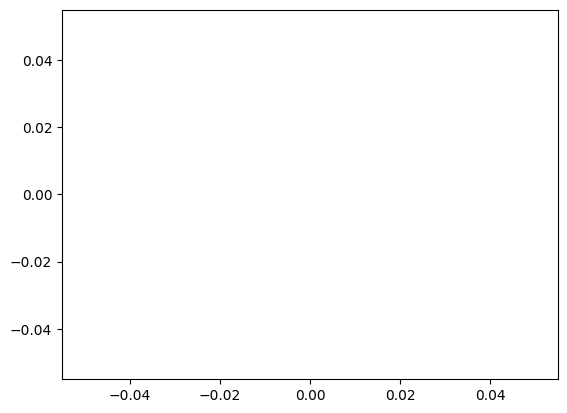

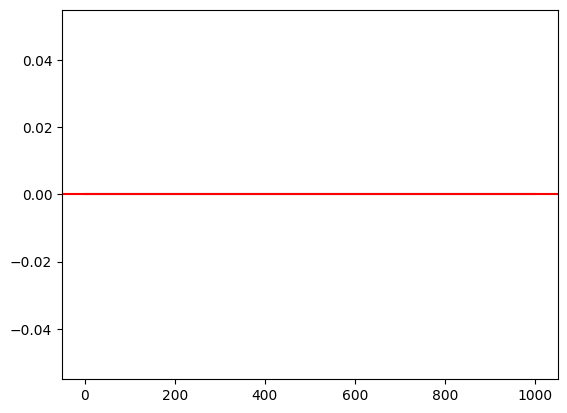

Mean of step size is : inf
Standard deviation of step size is : nan
Mean of sample is : 0.0
Standard deviation of sample is : 0.0
Standard Error of sample is : 0.0


<ipython-input-210-6b0479d22f6b>:19: RuntimeWarning: invalid value encountered in double_scalars
  variance = sum([((x - mean) ** 2) for x in h_tracker]) / len(h_tracker)


In [ ]:
#beta
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta+h, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta-h, ky, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta+h, ky, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta-h, ky, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

beta_mean, beta_res, beta_SE = results(t, h_tracker, numerical_diff_tracker)

<ipython-input-202-3332890a413b>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 2*np.sqrt(e*np.abs(f0/f2d))


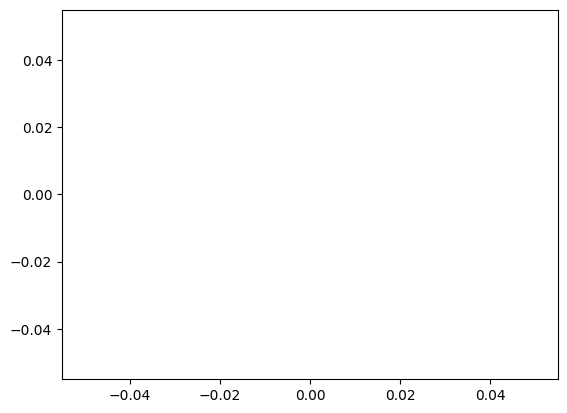

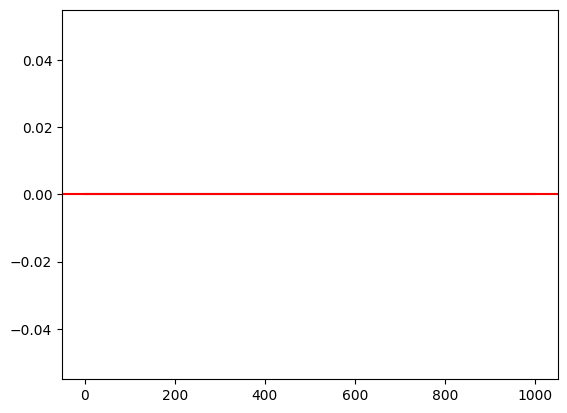

Mean of step size is : inf
Standard deviation of step size is : nan
Mean of sample is : 0.0
Standard deviation of sample is : 0.0
Standard Error of sample is : 0.0


<ipython-input-210-6b0479d22f6b>:19: RuntimeWarning: invalid value encountered in double_scalars
  variance = sum([((x - mean) ** 2) for x in h_tracker]) / len(h_tracker)


In [ ]:
#ky
h = 1E-06
h_tracker = []
numerical_diff_tracker = []

i = 0

while i <= max(t):
  f0 = pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky, ng)
  f2 = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky+h, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky-h, ng)))/(2*h)
  h = h_calc(e,f0,f2)
  #print(h)
  number = ((pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky+h, ng)) - (pos_vel_calc(px0, vx0, py0, vy0, pz0, vz0, T, a1, a2, slip, tf_sensor_1, tf_sensor_2, tf_sensor_3, tf_sensor_4, wr, ww, n0, n1, tr_sensor_1, tr_sensor_2, tr_sensor_3, tr_sensor_4, c, Kc, rho, g, Kp, phi, kx, hg, q, m, beta, ky-h, ng)))/(2*h)
  #print(number)
  h_tracker.append(h)
  numerical_diff_tracker.append(number)
  i = i+1

ky_mean, ky_res, ky_SE = results(t, h_tracker, numerical_diff_tracker)

In [ ]:
#Missing ng for the moment
Px_derv = [a1_mean, a2_mean, slip_mean, tf_mean, wr_mean, ww_mean, n0_mean, n1_mean, tr_mean, c_mean, Kc_mean, rho_mean, g_mean, Kp_mean, phi_mean, kx_mean, hg_mean, q_mean, m_mean, beta_mean, ky_mean]
Px_SD = [a1_res, a2_res, slip_res, tf_res, wr_res, ww_res, n0_res, n1_res, tr_res, c_res, Kc_res, rho_res, g_res, Kp_res, phi_res, kx_res, hg_res, q_res, m_res, beta_res, ky_res]
Px_SE = [a1_SE, a2_SE, slip_SE, tf_SE, wr_SE, ww_SE, n0_SE, n1_SE, tr_SE, c_SE, Kc_SE, rho_SE, g_SE, Kp_SE, phi_SE, kx_SE, hg_SE, q_SE, m_SE, beta_SE, ky_SE]

print(Px_derv)
print(Px_SD)
print(Px_SE)

[0.0026117264967698123, 0.0002611726496306001, 0.00026170625903451547, 0.017990391223816488, 0.0018542865887561653, 0.10788848652765969, -0.00037936245019270864, -3.793624531486677e-05, 0.0003461907875093714, 1.5765573668281865e-06, 8.301927759062379e-10, 5.269904011642465e-07, 8.863754025439463e-05, 5.119850706095655e-07, 0.001583947710127973, 0.0027056875898779113, 0.10154863747043295, 6.27070187983861e-06, -0.0003815129725987705, 0.0, 0.0]
[5.61379841558359e-12, 6.314568554636558e-17, 6.763988746616564e-17, 5.334915986711548e-16, 2.803734879515128e-12, 4.0519947148070934e-11, 1.633295317648785e-17, 8.244299387334726e-18, 4.708264896196477e-12, 2.5774603620611845e-19, 6.788632549793674e-21, 2.985118917126084e-14, 6.384106932564852e-13, 2.942317063369424e-14, 1.1455885480217189e-11, 6.867508644302198e-12, 6.091074159113647e-16, 4.13054297000256e-18, 2.1521612504316553e-17, 0.0, 0.0]
[5.664781448621181e-15, 6.371915796807829e-20, 6.825417504153949e-20, 5.383366283260896e-19, 2.82919765